In [1]:
import numpy as np
import glob
import utils

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
def get_metrics(expt_dir):
    metrics = {}
    
    measurement_losses = utils.load_if_pickled(expt_dir + '/measurement_losses.pkl')
    m_loss_mean = np.mean(measurement_losses.values())
    m_loss_std = np.std(measurement_losses.values())
    metrics['measurement'] = {'mean': m_loss_mean, 'std': m_loss_std}

    l2_losses =  utils.load_if_pickled(expt_dir + '/l2_losses.pkl')
    l2_loss_mean = np.mean(l2_losses.values())
    l2_loss_std = np.std(l2_losses.values())
    metrics['l2'] = {'mean':l2_loss_mean, 'std':l2_loss_std}

    return metrics

In [3]:
def get_signaure(expt_dir):
    temp = expt_dir.split('/')
    input_type, noise_std, num_measurements, model_type, other_hparams = temp[3:]
    signature = (input_type, float(noise_std), int(num_measurements), model_type, other_hparams)
    return signature

In [4]:
expt_dirs = glob.glob('../estimated/mnist/full_input/0.1/*/lasso/*') + \
            glob.glob('../estimated/mnist/random_test/0.1/*/nn/*') + \
            glob.glob('../estimated/mnist/random_test/0.1/*/omp/*') + \
            glob.glob('../estimated/mnist/gen_span/0.1/*/nn/*')

In [5]:
expt_metrics = {}
for expt_dir in expt_dirs:
    signature = get_signaure(expt_dir)
    metrics = get_metrics(expt_dir)
    expt_metrics[signature] = metrics    

In [6]:
def plot(expt_metrics, input_type, noise_std, model_type, metric, color=None):
    plot_data = {}
    lambda_best = {}        
    for key in expt_metrics.keys():
        input_type_, noise_std_, num_measurements, model_type_, other_hparams = key
        # (model_type_, noise_std_, num_measurements, lmbd) = key
        if (input_type_ == input_type) and \
           (noise_std_  == noise_std ) and \
           (model_type_ == model_type):
            if num_measurements not in plot_data:
                plot_data[num_measurements] = {'mean': 1e10, 'std': 1e10}
            if expt_metrics[key][metric]['mean'] < plot_data[num_measurements]['mean']:
                plot_data[num_measurements]['mean'] = expt_metrics[key][metric]['mean']
                plot_data[num_measurements]['std'] = expt_metrics[key][metric]['std']
                
    all_num_measurements = plot_data.keys()
    all_num_measurements.sort()
    x = all_num_measurements
    y = [plot_data[key]['mean'] for key in all_num_measurements]
    yerr = np.asarray([plot_data[key]['std'] for key in all_num_measurements])
    plt.errorbar(x, y, yerr=yerr, color=color)
    plt.xlabel('Number of measurements')
    plt.ylabel(metric + ' error')
    # plt.gca().set_ylim(bottom=0)

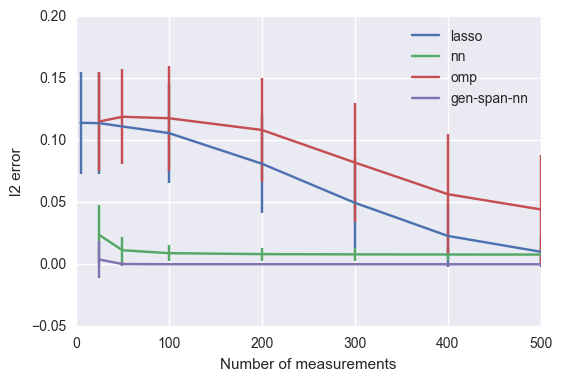

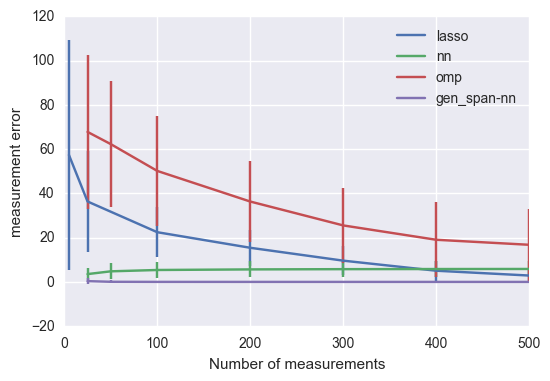

In [7]:
plt.figure()
plot(expt_metrics, 'full_input', 0.1, 'lasso', 'l2')
plot(expt_metrics, 'random_test', 0.1, 'nn', 'l2')
plot(expt_metrics, 'random_test', 0.1, 'omp', 'l2')
plot(expt_metrics, 'gen_span', 0.1, 'nn', 'l2')
plt.legend(['lasso', 'nn', 'omp', 'gen-span-nn'])

plt.figure()
plot(expt_metrics, 'full_input', 0.1, 'lasso', 'measurement')
plot(expt_metrics, 'random_test', 0.1, 'nn', 'measurement')
plot(expt_metrics, 'random_test', 0.1, 'omp', 'measurement')
plot(expt_metrics, 'gen_span', 0.1, 'nn', 'measurement')
plt.legend(['lasso', 'nn', 'omp', 'gen_span-nn'])

In [10]:
def plot_var_vs_lambda(expt_metrics, input_type, noise_std, model_type, metric, color=None):
    plot_data = {}        
    for key in expt_metrics.keys():
        input_type_, noise_std_, num_measurements, model_type_, other_hparams = key
        if (input_type_ == input_type) and \
           (noise_std_  == noise_std ) and \
           (model_type_ == model_type):
            if other_hparams not in plot_data:
                plot_data[other_hparams] = {}
            if num_measurements not in plot_data[other_hparams]:
                plot_data[other_hparams][num_measurements] = 1e10
            if expt_metrics[key][metric]['mean'] < plot_data[other_hparams][num_measurements]:
                plot_data[other_hparams][num_measurements] = expt_metrics[key][metric]['mean']

    plt.figure()
    legends = []
    for other_hparams in plot_data:
        all_num_measurements = plot_data[other_hparams].keys()
        all_num_measurements.sort()
        x = all_num_measurements
        y = [plot_data[other_hparams][key] for key in all_num_measurements]
        plt.plot(x, y, color=color)
        plt.xlabel('Number of measurements')
        plt.ylabel(metric + ' error')
        plt.gca().set_ylim(bottom=0)
        legends.append(other_hparams)
    plt.legend(legends, loc='lower left')

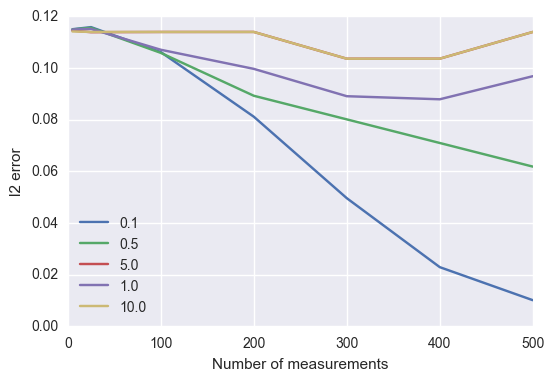

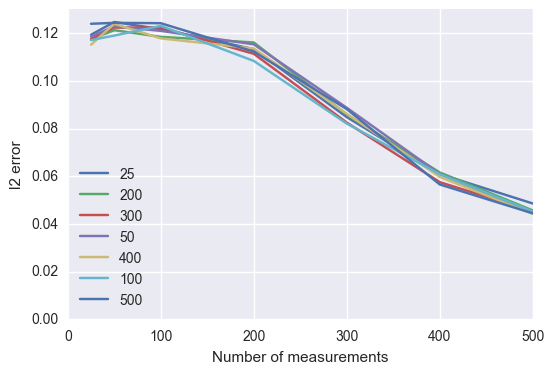

In [11]:
plot_var_vs_lambda(expt_metrics, 'full_input', 0.1, 'lasso', 'l2')
plot_var_vs_lambda(expt_metrics, 'random_test', 0.1, 'omp', 'l2')